참고자료

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test, y_test) =  tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# 데이터 정규화
x_train_scaled ,x_test_scaled = x_train / 255.0, x_test / 255.0

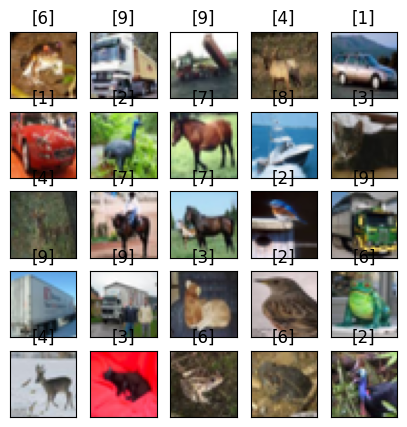

In [4]:
# 학습데이터 시각화
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


In [5]:
import numpy as np

In [6]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [18]:
# 출력의 개수는 ( 분류하고자하는 분류의 종류 즉 class의 종류)
model =  models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]), # (32,32,3)
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
# 모델 학습
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2730 - loss: 1.9242 - val_accuracy: 0.4907 - val_loss: 1.3946
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.4810 - loss: 1.4269 - val_accuracy: 0.5677 - val_loss: 1.2284
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5373 - loss: 1.2951 - val_accuracy: 0.5911 - val_loss: 1.1526
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5586 - loss: 1.2258 - val_accuracy: 0.6272 - val_loss: 1.0586
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5827 - loss: 1.1734 - val_accuracy: 0.6189 - val_loss: 1.1017
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5950 - loss: 1.1453 - val_accuracy: 0.6339 - val_loss: 1.0151
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6093 - loss: 1.0973 - val_accuracy: 0.6651 - val_loss: 0.9785
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6198 - loss: 1.0804

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

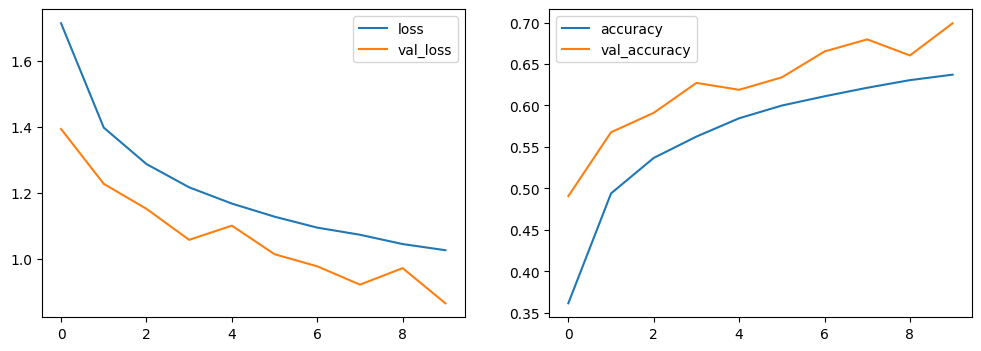

In [22]:
# 학습결과 시각화 및 과적합 여부 확인
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

- 성능평가 : ROC(Receiver Operating Characteristic)-AUC(Area Under Curve)
  - 분류모델의 성능을 평가하는데 사용, 곡선 아래 면적은 모델의 분류 능력을 나타냄 1에 가까울수록 더 나은 모델 성능을 의미

In [23]:
from sklearn.metrics import roc_curve, auc,roc_auc_score,classification_report,confusion_matrix

In [28]:
y_predict = model.predict(x_test_scaled)
y_test.shape,y_predict.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((10000, 1), (10000, 10))

In [29]:
y_predict = np.argmax(y_predict,axis=1)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.83      0.87      0.85      1000
           2       0.66      0.47      0.55      1000
           3       0.51      0.46      0.49      1000
           4       0.60      0.65      0.63      1000
           5       0.60      0.60      0.60      1000
           6       0.68      0.84      0.75      1000
           7       0.73      0.73      0.73      1000
           8       0.79      0.85      0.82      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


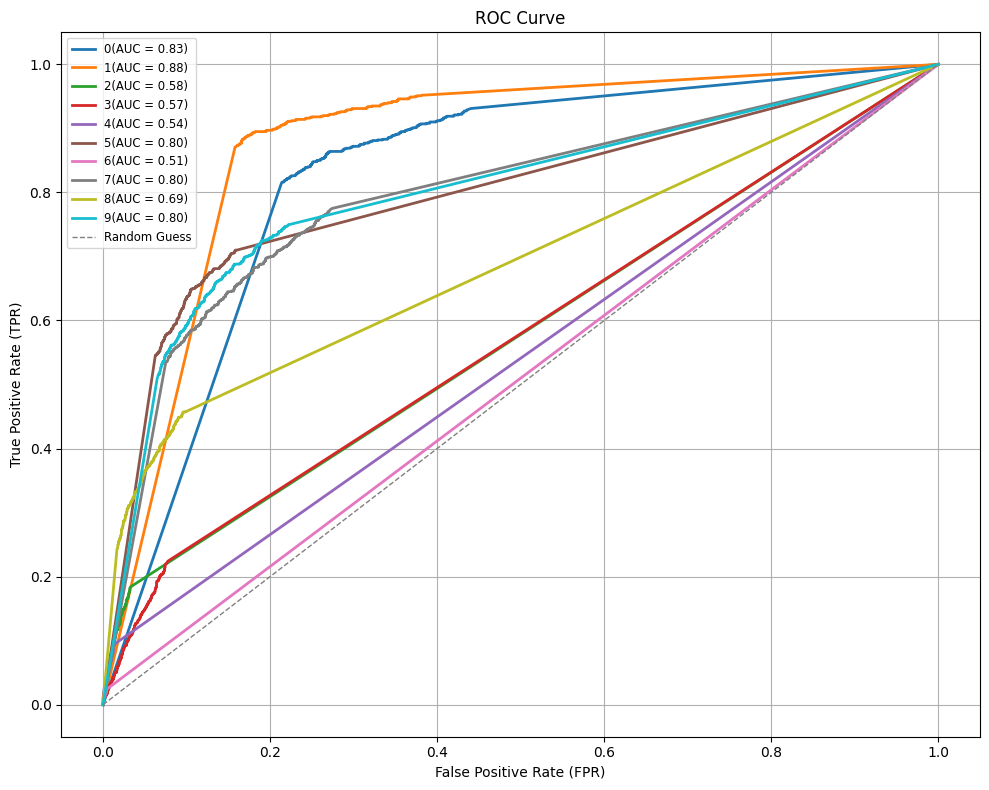

In [33]:
# 이진분류를 위한 샘플데이터
def showRocAuc(binary_class=0):
  y_train_binary = (y_train == binary_class).astype(int).flatten()
  y_test_binary = (y_test == binary_class).astype(int).flatten()
  #모델 예측 확률 계산
  y_predict_prob = model.predict(x_test)[:,binary_class]
  # ROC  곡선 데이터 계산
  fpr,tpr,_ = roc_curve(y_test_binary,y_predict_prob)
  # AUC 계산
  roc_auc = auc(fpr,tpr)
  return fpr,tpr,roc_auc

# ROC 곡선 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # 컬러맵

for i in range(10):
  fpr,tpr,roc_auc = showRocAuc(i)
  plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{i}(AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess') # 대각선
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
# plt.legend(loc='lower right')
plt.legend(loc='best', fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()


- 성능개선
  - 데이터증가
  - 모델변경(아키텍처 개선)
  - 정규화(정규화 레이어 적용)
  - 학습 스케줄링(학습률을 동적으로 적용)
  - 하이퍼 파라메터 튜닝
    - epoch수 조기종료

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 데이터 생성기 정의
datagen = ImageDataGenerator(
    rotation_range=15,      # 회전 범위
    width_shift_range=0.1,  # 수평 이동
    height_shift_range=0.1, # 수직 이동
    horizontal_flip=True,   # 수평 뒤집기
    zoom_range=0.1,         # 확대/축소
    shear_range=0.1,        # 전단 변환
    fill_mode='nearest'     # 채움 모드
)
# 데이터 증강 적용(학습데이터에만 적용)
datagen.fit(x_train_scaled)

# 모델의 아키텍처 변환
model =  models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]), # (32,32,3)
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습(fit 대신 fit_generator 사용)
history = model.fit(datagen.flow(x_train_scaled, y_train, batch_size=32),
                    epochs=100, validation_data=(x_test_scaled, y_test),
                    steps_per_epoch=len(x_train) // 64,  # 64 batch를 사용
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True),
                               # 학습률을 동적으로 조정
                               tf.keras.callbacks.ReduceLROnPlateau(patience=3,monitor='val_loss',factor=0.5)
                               ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/781 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.2073 - loss: 2.4758